In [1]:
import numpy as np

import wandas as wd

# トリミング

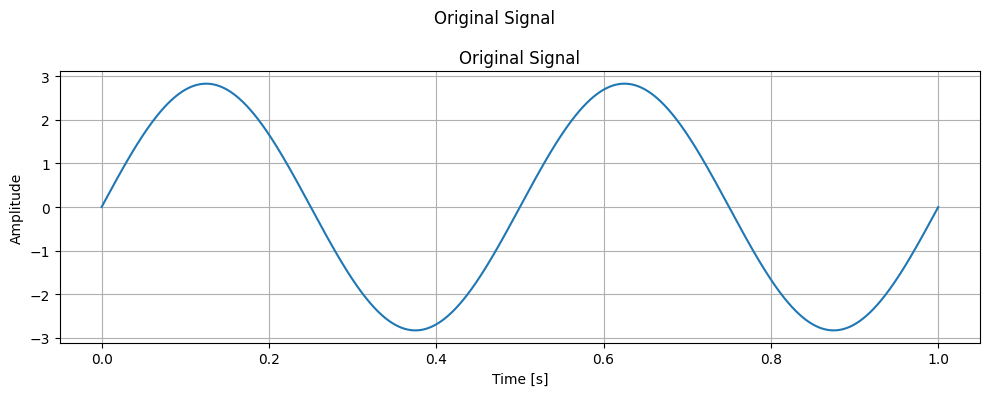

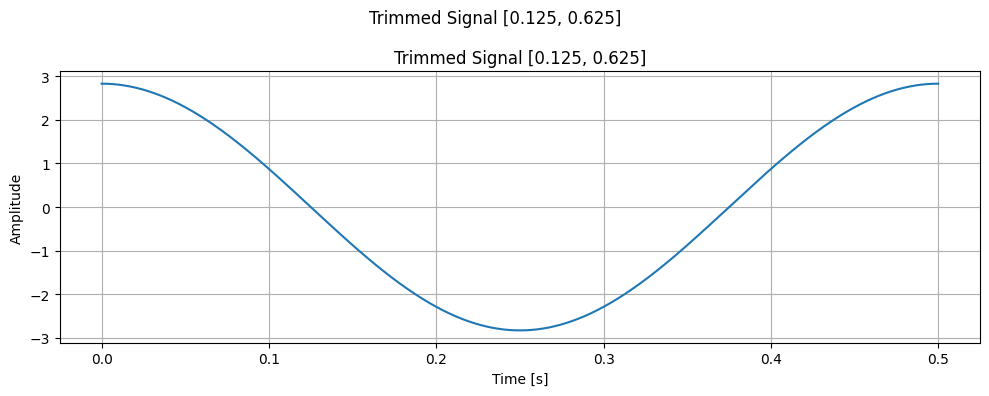

In [2]:
signal = wd.generate_sin(freqs=[2], duration=1, label="Original Signal")
signal.plot()

start, end = 0.125, 0.625
signal.trim(start, end).plot(title=f"Trimmed Signal [{start}, {end}]")

## レベルトリガー

In [ ]:
# レベルトリガー対象の信号作成。2秒間隔でパルスが発生する信号
fs = 1000
length = 3000
signal = np.zeros(length)

signal[fs:][::fs] = 1

# 2秒間隔で三角波が発生する信号を作成
triangle = np.zeros_like(signal)
for level, i in enumerate(range(0, length, fs)):
    triangle[i : i + fs // 2] = np.linspace(0, 1, fs // 2) * level
    triangle[i + fs // 2 : i + fs] = np.linspace(1, 0, fs // 2) * level

signal = wd.from_ndarray(
    np.stack([signal, triangle]), sampling_rate=fs, ch_labels=["Pulse", "Triangle"]
)
signal.plot()
points = signal[0].trigger(threshold=0.5)
mfs = signal.cut(points, cut_len=1.0)

for i, mf in enumerate(mfs):
    mf.plot(title=f"Cut Signal {i}")

TypeError: ChannelFrame.from_numpy() got an unexpected keyword argument 'labels'